In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Create your df here:
df = pd.read_csv("profiles_clean.csv")

In [4]:
df.income.head()

0    30000.0
1    80000.0
2    30000.0
3    20000.0
4    30000.0
Name: income, dtype: float64

In [5]:
df.income.value_counts()
df.income = df.income.fillna(50000.0)
df.age = df.age.fillna(40)

In [6]:
df.age.value_counts()

26     3723
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1582
37     1427
38     1330
21     1282
39     1173
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
Name: age, dtype: int64

In [8]:
df.income.value_counts()

30000.0      49488
20000.0       2952
100000.0      1621
80000.0       1111
40000.0       1004
50000.0        976
60000.0        736
70000.0        707
150000.0       631
1000000.0      521
250000.0       149
500000.0        48
Name: income, dtype: int64

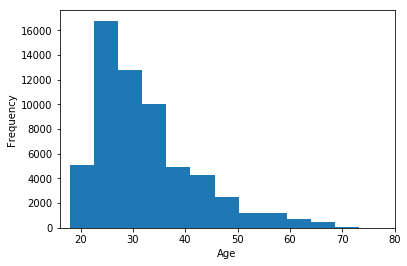

In [9]:
plt.hist(df.age,bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16,80)
plt.show()

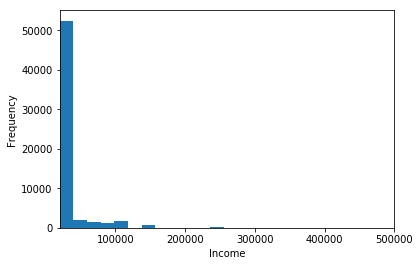

In [10]:
plt.hist(df.income,bins=50)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(20000,500000)
plt.show()

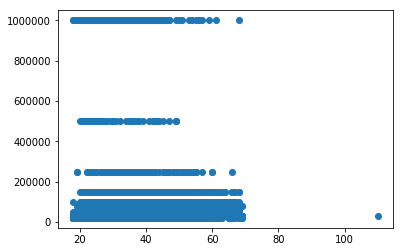

In [11]:
plt.scatter(df.age, df.income)
plt.show()

In [12]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)
df.drinks_code = df.drinks_code.fillna(1.0)

In [13]:
df.smokes.value_counts()

no                43893
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [14]:
smokes_mapping = {"no": 0, "sometimes": 1, "trying to quit": 2, "yes": 3, "when drinking": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)
df.smokes_code = df.smokes_code.fillna(1.0)

In [15]:
df.drugs.value_counts()

never        37722
sometimes     7732
often          410
Name: drugs, dtype: int64

In [16]:
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)
df.drugs_code = df.drugs_code.fillna(0.0)

In [17]:
df.education.value_counts()

graduated from college/university    23957
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [18]:
education_mapping = {"graduated from ph.d program" or "ph.d program" or "med school" or "graduated from med school" or "working on ph.d program": 0, "graduated from college/university" or "graduated from masters program" or "working on college/university" or "working on masters program" or "working on law school" or "dropped out of ph.d program" or "graduated from law school" or "college/university" or "working on med school": 1, "graduated from two-year college" or
                     "graduated from high school" or "working on high school" or "dropped out of med school" or "dropped out of law school" or "dropped out of masters program" or "graduated from space camp" or "working on two-year college" or "working on space camp" or "two-year college": 2, "graduated from high school" or "dropped out of high school" or "dropped out of space camp" or "dropped out of two-year college" or "dropped out of college/university" or "high school" or "working on high school" or "space camp": 3}
df["education_code"] = df.education.map(education_mapping)
df.education_code = df.education_code.fillna(3.0)
#df.education_code

In [19]:
df.job.value_counts()

other                                7588
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4438
sales / marketing / biz dev          4391
medicine / health                    3679
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [20]:
job_mapping = {"science / tech / engineering" or "computer / hardware / software" or "medicine / health" or "education / academia" or "executive / management" or "law / legal services": 0, "banking / financial / real estate" or "entertainment / media" or "artistic / musical / writer" or "sales / marketing / biz dev" or "hospitality / travel" or "construction / craftsmanship" or "clerical / administrative" or "political / government" or "transportation" or "military": 1, "other" or "student" or "unemployed" or "retired" or "rather not say": 2}
df["job_code"] = df.job.map(job_mapping)
df.job_code = df.job_code.fillna(2.0)

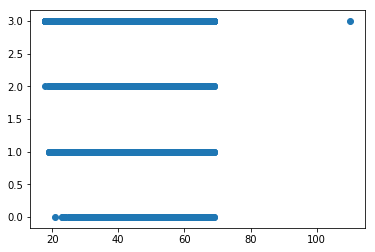

In [21]:
plt.scatter(df.age, df.education_code)
plt.show()

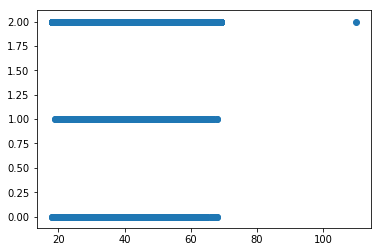

In [22]:
plt.scatter(df.age, df.job_code)
plt.show()

In [23]:
x = df[['age','education_code','job_code','drinks_code','smokes_code','drugs_code']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y = df[['income']]
y_scaled = min_max_scaler.fit_transform(y)

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, train_size = 0.8, test_size = 0.2, random_state=6)

In [26]:
mlr = LinearRegression()
model=mlr.fit(x_train, y_train)

In [27]:
%%time
model.fit(x_train, y_train)

Wall time: 15.6 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_predict = mlr.predict(x_test)
#Evaluate the model
mae = np.mean(abs(y_predict - y_test))
print('Multiple Linear Regression Performance on the test set: MAE = %0.4f' % mae)

Multiple Linear Regression Performance on the test set: MAE = 0.0269


In [29]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.005372195694882009
Test score:
0.005554581189474828


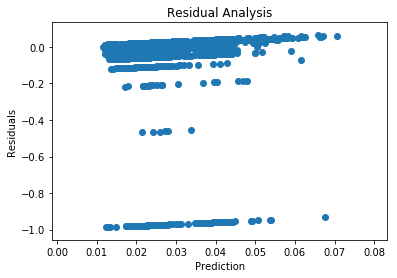

In [30]:
residuals = y_predict - y_test

plt.scatter(y_predict, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title('Residual Analysis')

plt.show()

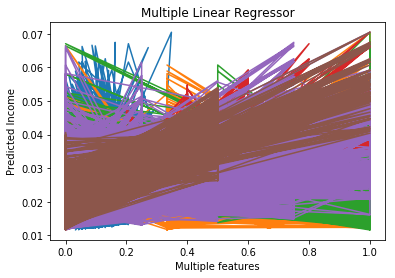

In [36]:
plt.plot(x_test, y_predict)
plt.title('Multiple Linear Regressor')
plt.xlabel("Multiple features")
plt.ylabel("Predicted Income")
plt.show()

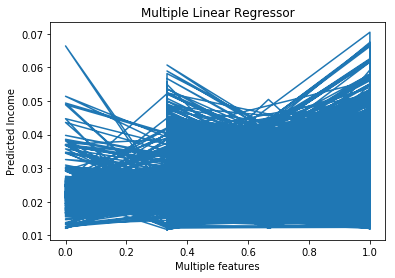

In [37]:
plt.plot(x_test[:,1], y_predict)
plt.title('Multiple Linear Regressor')
plt.xlabel("Multiple features")
plt.ylabel("Predicted Income")
plt.show()

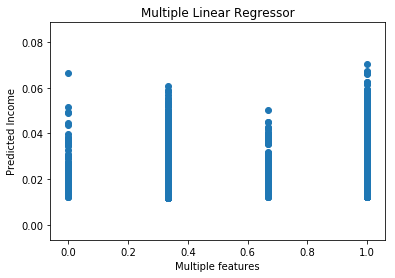

In [38]:
plt.scatter(x_test[:,1], y_predict)
plt.title('Multiple Linear Regressor')
plt.xlabel("Multiple features")
plt.ylabel("Predicted Income")
plt.show()

In [39]:
from sklearn.metrics import r2_score

In [40]:
print("R2 Score")
print(r2_score(y_test, y_predict))

R2 Score
0.005554581189474828


In [41]:
x1 = df[["income"]]
y1 = df[["age"]]

In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state=6)
lr = LinearRegression()

In [43]:
%%time
model1 = lr.fit(x1_train, y1_train)
model1.fit(x1_train, y1_train)

Wall time: 344 ms


In [44]:
y1_predict = lr.predict(x1_test)

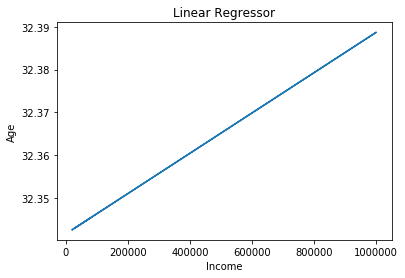

In [45]:
plt.plot(x1_test,y1_predict)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Linear Regressor")
plt.show()

In [46]:
mae = np.mean(abs(y1_predict - y1_test))
print('Linear Regression Performance on the test set: MAE = %0.4f' % mae)

Linear Regression Performance on the test set: MAE = 7.2425


In [47]:
print("Training score")
print(lr.score(x1_train, y1_train))
print("Testing score")
print(lr.score(x1_test, y1_test))

Training score
2.1254555004901476e-07
Testing score
-1.618585193652322e-05


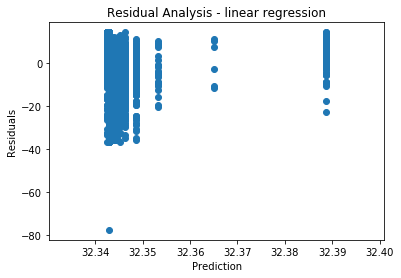

In [48]:
residuals = y1_predict - y1_test

plt.scatter(y1_predict, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title('Residual Analysis - linear regression')

plt.show()

In [49]:
print("R2 Score")
print(r2_score(y1_test, y1_predict))

R2 Score
-1.618585193652322e-05


In [50]:
np.unique(y1_test)

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
       110], dtype=int64)

In [51]:
np.unique(y1_predict)

array([32.3424729 , 32.34294481, 32.34341672, 32.34388864, 32.34436055,
       32.34483246, 32.34530437, 32.3462482 , 32.34860776, 32.35332688,
       32.36512469, 32.3887203 ])

In [57]:
# Let me try if job can be predicted from education
x5 = df.education_code.values.reshape(-1,1)
y5 = df.job_code.values.reshape(-1,1)
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size = 0.8, test_size = 0.2, random_state=6)
lr = LinearRegression()

In [53]:
#x5_train = x5_train.ravel()
#y5_train = y5_train.ravel()

In [58]:
x5_train

array([[3.],
       [3.],
       [1.],
       ...,
       [3.],
       [1.],
       [3.]])

In [59]:
y5_train

array([[2.],
       [2.],
       [2.],
       ...,
       [0.],
       [2.],
       [2.]])

In [60]:
%%time
model5 = lr.fit(x5_train, y5_train)
model5.fit(x5_train, y5_train)

Wall time: 0 ns


In [61]:
y5_predict = lr.predict(x5_test)

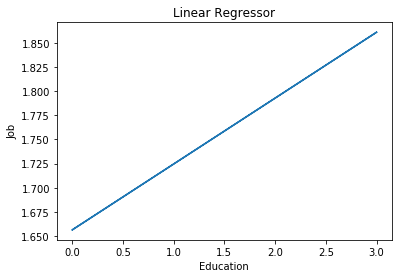

In [62]:
plt.plot(x5_test,y5_predict)
plt.xlabel("Education")
plt.ylabel("Job")
plt.title("Linear Regressor")
plt.show()

In [63]:
mae = np.mean(abs(y5_predict - y5_test))
print('Linear Regression Performance on the test set: MAE = %0.4f' % mae)

Linear Regression Performance on the test set: MAE = 0.3450


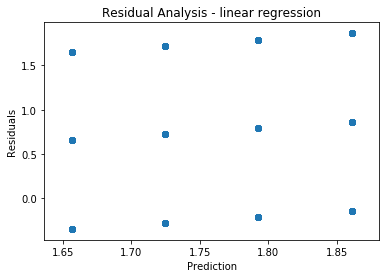

In [64]:
residuals = y5_predict - y5_test

plt.scatter(y5_predict, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title('Residual Analysis - linear regression')

plt.show()

In [65]:
print("R2 Score")
print(r2_score(y5_test, y5_predict))

R2 Score
0.013558047724681943


In [66]:
from sklearn.neighbors import KNeighborsRegressor
%time
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(x1_train, y1_train)
knn_predict = knn_regressor.predict(x1_test)

Wall time: 0 ns


In [67]:
knn_predict

array([[29.6],
       [29.6],
       [29.6],
       ...,
       [29.6],
       [29.6],
       [27. ]])

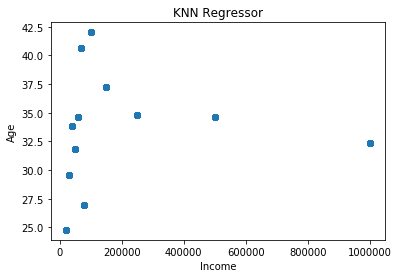

In [68]:
plt.scatter(x1_test,knn_predict)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("KNN Regressor")
plt.show()

In [69]:
mae = np.mean(abs(knn_predict - y1_test))
print('KNN Regression Performance on the test set: MAE = %0.4f' % mae)

KNN Regression Performance on the test set: MAE = 6.9053


In [150]:
print("R2 Score")
print(r2_score(y1_test, knn_predict))

R2 Score
-0.060357387186557476


In [70]:
print("Training score")
print(knn_regressor.score(x1_train, y1_train))
print("Testing score")
print(knn_regressor.score(x1_test, y1_test))

Training score
-0.07050300971682821
Testing score
-0.060357387186557476


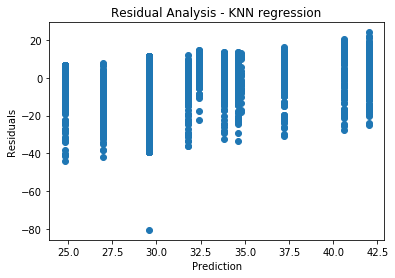

In [71]:
residuals = knn_predict - y1_test

plt.scatter(knn_predict, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title('Residual Analysis - KNN regression')

plt.show()

In [144]:
#predict job from education using knn regressor
knn_regressor.fit(x5_train, y5_train)
knn_predict_job = knn_regressor.predict(x5_test)

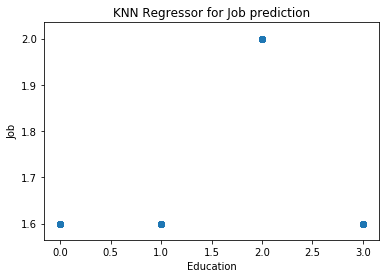

In [145]:
plt.scatter(x5_test,knn_predict_job)
plt.xlabel("Education")
plt.ylabel("Job")
plt.title("KNN Regressor for Job prediction")
plt.show()

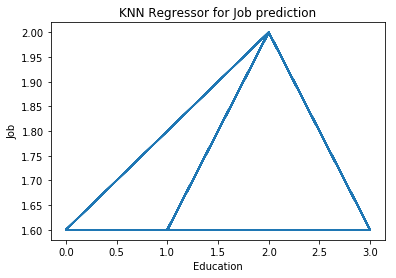

In [146]:
plt.plot(x5_test,knn_predict_job)
plt.xlabel("Education")
plt.ylabel("Job")
plt.title("KNN Regressor for Job prediction")
plt.show()

In [148]:
mae = np.mean(abs(knn_predict_job - y5_test))
print('KNN Regression Performance on the test set: MAE = %0.4f' % mae)

KNN Regression Performance on the test set: MAE = 0.4943


In [149]:
print("R2 Score")
print(r2_score(y5_test, knn_predict_job))

R2 Score
-0.1208440799323185


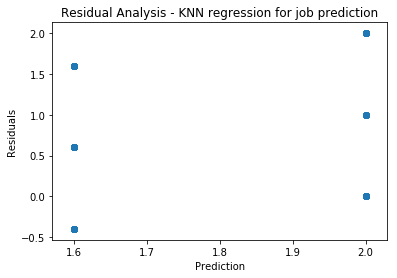

In [151]:
residuals = knn_predict_job - y5_test

plt.scatter(knn_predict_job, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title('Residual Analysis - KNN regression for job prediction')

plt.show()

In [72]:
df.sex.value_counts()

m    35826
f    24117
Name: sex, dtype: int64

In [73]:
sex_mapping = {"m": 0, "f": 1}
df["sex_code"] = df.sex.map(sex_mapping)
df.sex_code = df.sex_code.fillna(1.0)

In [74]:
#KNN Classifier - predict job with education level and sex
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)

In [75]:
df.education_code.ravel()
df.job_code.ravel()
x2 = df[['job_code','drinks_code','smokes_code','drugs_code']]
y2 = df[['education_code']]
#y2 = y2.sex.ravel()

In [118]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state=6)

In [119]:
%%time
knn_classifier.fit(x2_train, y2_train)
knn_class_predict = knn_classifier.predict(x2_test)

C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Wall time: 4.33 s


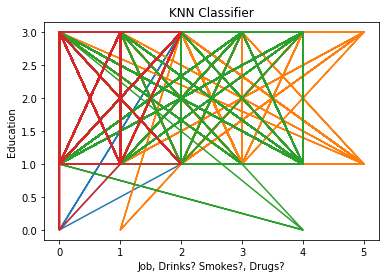

In [120]:
plt.plot(x2_test,knn_class_predict)
plt.xlabel("Job, Drinks? Smokes?, Drugs?")
plt.ylabel("Education")
plt.title("KNN Classifier")
plt.show()

In [121]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [122]:
print("Accuracy")
print(accuracy_score(y2_test, knn_class_predict))

Accuracy
0.5309033280507132


In [123]:
print("Precision")
print(precision_score(y2_test, knn_class_predict, average = 'macro'))

Precision
0.24823734747693926


C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
print("Recall")
print(recall_score(y2_test, knn_class_predict, average = 'macro'))

Recall
0.25872055243653824


In [125]:
print("F1 Score")
print(f1_score(y2_test, knn_class_predict, average = 'macro'))

F1 Score
0.2465963809743255


C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
print("Training score")
print(knn_classifier.score(x2_train, y2_train))
print("Testing score")
print(knn_classifier.score(x2_test, y2_test))

Training score
0.5357731206339277
Testing score
0.5309033280507132


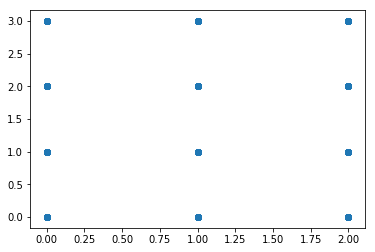

In [127]:
plt.scatter(df.job_code, df.education_code)
plt.show()

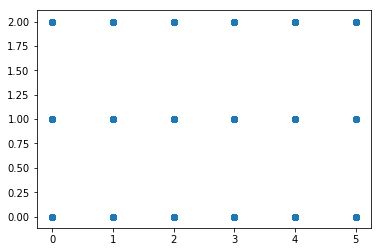

In [128]:
plt.scatter(df.drinks_code, df.job_code)
plt.show()

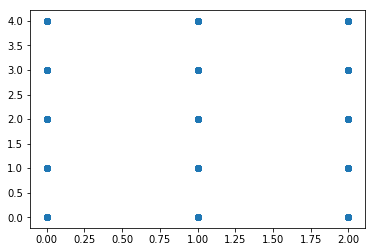

In [129]:
plt.scatter(df.job_code, df.smokes_code)
plt.show()

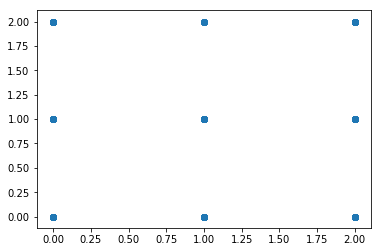

In [130]:
plt.scatter(df.job_code, df.drugs_code)
plt.show()

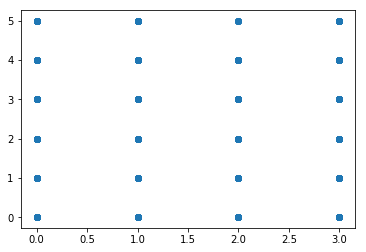

In [131]:
plt.scatter(df.education_code, df.drinks_code)
plt.show()

In [132]:
from sklearn.naive_bayes import MultinomialNB


In [133]:
x3 = df[['job_code','drinks_code','smokes_code','drugs_code']]
y3 = df[['education_code']]

In [134]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8, test_size = 0.2, random_state=6)

In [135]:
%%time
nb_classifier = MultinomialNB()
nb_classifier.fit(x3_train, y3_train)
nb_predict = nb_classifier.predict(x3_test)

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 484 ms


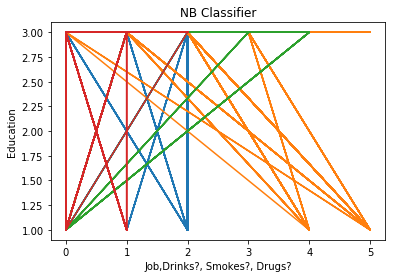

In [136]:
plt.plot(x3_test,nb_predict)
plt.xlabel("Job,Drinks?, Smokes?, Drugs?")
plt.ylabel("Education")
plt.title("NB Classifier")
plt.show()

In [138]:
print("Accuracy")
print(accuracy_score(y3_test, nb_predict))

Accuracy
0.5554258069897406


In [139]:
print("Accuracy")
print(accuracy_score(y3_test, nb_predict))
print("Precision")
print(precision_score(y3_test, nb_predict, average = 'macro'))
print("Recall")
print(recall_score(y3_test, nb_predict, average = 'macro'))
print("F1 Score")
print(f1_score(y3_test, nb_predict, average = 'macro'))

Accuracy
0.5554258069897406
Precision
0.2223989729850413
Recall
0.24977746521170416
F1 Score
0.1800220357774195


C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
from sklearn.svm import SVC
x4 = df[['job_code','drinks_code','smokes_code','drugs_code']]
y4 = df[['education_code']]
#y4 = y4.sex.ravel()
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, train_size = 0.8, test_size = 0.2, random_state=6)
sv_classifier = SVC(kernel = 'linear')

In [141]:
%%time
sv_classifier.fit(x4_train, y4_train)
sv_predict = sv_classifier.predict(x4_test)

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 42.1 s


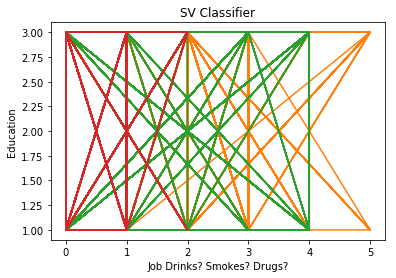

In [142]:
plt.plot(x4_test,sv_predict)
plt.xlabel("Job Drinks? Smokes? Drugs?")
plt.ylabel("Education")
plt.title("SV Classifier")
plt.show()

In [143]:
print("Accuracy")
print(accuracy_score(y4_test, sv_predict))
print("Precision")
print(precision_score(y4_test, sv_predict, average = 'macro'))
print("Recall")
print(recall_score(y4_test, sv_predict, average = 'macro'))
print("F1 Score")
print(f1_score(y4_test, sv_predict, average = 'macro'))

Accuracy
0.5674368170823255
Precision
0.27118429874486816
Recall
0.2651998548869987
F1 Score
0.2324075988855963


C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
